In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scp
import nltk
import imageio
import sklearn

from timeit import default_timer as timer
%matplotlib inline

import json as js

# Project
### Stages

**Timetable**

| Time | Task |
|----|----|
|9.9. | Groups deadline |
|16.9.| Topics deadline |
| here | EDA, clean data, do project |
|vk42 | presentation |
|vk43 | projektit |

## Project
```
A. Title of the project	
            
B. Elevator pitch [max 400 characters]
 
Describe the data science challenges related to the following themes. 
A good project should include interesting challenges under most of 
the themes. So for example, a project that begins with a single clean
data set and a clear task (e.g., predict a given response), isn't a good 
choice for your project.		
            
C. Data: sources, wrangling, management		
            
D. Data analysis: statistics, machine learning	
            
E. Communication of results: summarization & visualization
            
F. Operationalization: creating added value, end-user point of view
```

- 4x20x10000 stuctures with 19-30 atoms in a cluster
    - coordinates
    - dipole moment
    - energy
- Goals
    - End user
        - Configuration Sampling 
            - Find one structure with the lowest energy
    - Eliminate redundant structures
    - Find descriptors
        - reduce dimensions
    

## Pitch talk 3min

- Sell oriented
    - Not technical
- Slides, picures, figures
    - Why useful
    - Why interesting
- Any person or all

> We could make video from screenshots describing the problem

> Check project-instructions for deadlines (tue 22.10. klo 23.59)

#### Read data in

Data must have a `.csv`-file that contains:

| col1 | col2 | col3 | col4 | col5 |
|------|------|------|------|------|
| Filename | path to .log-file | path to .xyz-file | Dipole moment | Energy |

Make the csv-file 
> Maybe later

Should read one sample xyz-file to construct headers and get shapes to an array

In [2]:
def init_DF(csvfile):
    "Reads a xyz-file and initializes the dataframe."
    
    filescsv = pd.read_csv(csvfile)
    xyz_temp = filescsv.iloc[0,2]  # to get one xyz(path) as a reference
    
    xyz_test = read_xyz(xyz_temp,False) # Read it to a DF
    
    #filenames = filescsv.iloc[:,0] # Take this one with init_xyz_flatrray()
    n_atoms = xyz_test.index.size
    atomnames = np.array(xyz_test.index)
    
    list_atomnames = []
    for i,j in enumerate(atomnames):
        list_atomnames.append("{} {}".format(j,i))
    arr_atomnames = np.array(list_atomnames)
    
    col_names = makeMultiIndexs(arr_atomnames)

    arr_clusters,filenames = init_xyz_array(filescsv,n_atoms) # to have the actual data
    
    coord_df = pd.DataFrame(arr_clusters,index=filenames,columns=col_names)
    
    
    return coord_df

In [3]:
def init_xyz_array(filecsv, n_atoms):
    "Reads paths from .csv and returns an array with all coords in rows, and the filenames for DF indexes"
    arr_clusters = np.zeros((1,3*n_atoms+2))
    filenames = np.array(filecsv.Filename)
    for index, row in filecsv.iterrows():
        #filename = row.Filename
        dipole = row.Dipole
        energy = row.Energy
        metarr = np.array([energy,dipole])
        path = row.XYZPath
        xyzs = read_xyz(path) #flatten=True by default

        if index == None:
            print("Filename:",filename)
            print("metarr:",metarr)
            print("shape:",metarr.shape)
            print("type:",type(metarr))
            print("path:",path)
            print("coordshape:",xyzs.shape)
            print("coords:",xyzs)
        
        arrr = np.array(list(metarr)+list(xyzs))
        arr_clusters = np.vstack((arr_clusters,arrr))
    return arr_clusters[1:,:], filenames

In [4]:
def read_xyz(xyzfile,flatten=True):
    """
    usage: read_xyz(xyzfile,flatten(Default=True))
    
    Reads a xyz-file and returns the coordinates as DF
    or flattened to a Numpy-array
    """
    xyz_temp = pd.read_csv(xyzfile, \
                       sep='\s+', \
                       skiprows=2, \
                       header=None, \
                       index_col=0, \
                       names=['x','y','z']\
                      ).sort_index(ascending=False)
    
    if flatten==True:
        xyz_flat = xyz_temp.values.flatten().reshape(1,57)#.astype(np.float)
        return xyz_flat[0]
    else:
        return xyz_temp

In [5]:
def makeMultiIndexs(arr):
    """
    Gets names of atoms as array and makes a pandas multi-indexing structure
    with x-, y- and z- columns for each atom.
    """
    top_arr = np.empty((arr.size * 3 +2)).astype(str)
    top_arr[0] = "Properties"
    top_arr[1] = "Properties"
    top_arr[2::3] = arr
    top_arr[3::3] = arr
    top_arr[4::3] = arr
    butt_arr = np.empty((arr.size * 3 +2)).astype(str)
    butt_arr[0] = "Energy"
    butt_arr[1] = "Dipole"
    butt_arr[2::3] = "x"
    butt_arr[3::3] = "y"
    butt_arr[4::3] = "z"
    col_arr = np.vstack((top_arr,butt_arr))
    #col_arr.transpose()
    col_arr_tuples = list(zip(*col_arr))
    col_names = pd.MultiIndex.from_tuples(col_arr_tuples, names=["Atom","Coord"])
    return col_names

In [6]:
clusters_df = init_DF("Data_Collection.csv")

In [212]:
clusters_df

Atom  Properties              S 0                           O 1            \
Coord     Energy Dipole         x         y         z         x         y   
0     -40.917924  2.402  0.141169  0.586462 -1.579178  1.571959  0.634674   
10    -40.918934  2.326 -0.177089  1.302912  1.137282 -0.392561 -2.623296   
11    -40.918934  2.327 -0.227542 -0.617363  1.608923  1.811184  0.387736   
12    -40.918934  2.326  0.540501  0.377112 -1.608442  0.975239  1.453282   
13    -40.918934  2.328  1.066284 -0.013339 -1.373346 -0.974237  1.912913   
14    -40.918934  2.328  1.509850 -0.561409 -0.653578 -1.161073 -1.814866   
15    -40.917931  2.597 -0.857265  1.079837  1.088537  2.365683  0.627555   
16    -40.917931  2.598  0.590506 -0.201322  1.642298  2.062320 -0.912886   
17    -40.917931  2.600 -0.267809 -1.735988  0.038555  1.972009 -0.333858   
18    -40.917931  2.603 -1.037449 -0.061844 -1.416489 -1.899664  0.586219   
19    -40.917931  2.598  0.786254 -1.222787 -0.986744 -2.449959 -0.252961   
1     -40.916876  2.607  0.532400  0.529017 -1.645222  1.375753  0.925034   
20    -40.917931  2.599 -1.102559 -0.744260 -1.147424  0.140181  2.443746   
21    -40.922190  2.613 -0.574715  0.238897  0.976136  2.031549  1.210390   
22    -40.922190  2.613  0.442141 -0.840002 -0.662614  1.121726  0.460891   
23    -40.922190  2.614 -0.488733 -0.456259 -0.945008  1.917096  1.737489   
24    -40.922190  2.612 -0.051984 -1.139167  0.199199  2.013621  1.630974   
25    -40.922190  2.613 -0.540581 -0.388679 -0.947001  2.123949 -0.901871   
26    -40.922190  2.613 -0.394467 -0.984709 -0.463636  2.188663  0.457676   
27    -40.921741  2.760  0.415990  0.145347  0.780625 -0.348551  2.202047   
28    -40.921741  2.761  0.668327  0.099417 -0.588390 -0.799398  2.353327   
29    -40.921741  2.765  0.406116 -0.197649 -0.773286 -2.617565 -1.496115   
2     -40.917924  2.399  0.411648  0.774200 -1.445017  1.090589  1.193316   
30    -40.921741  2.764  0.105563 -0.437403 -0.773948  2.366240 -2.390947   
31    -40.921741  2.766 -0.582827  0.568920 -0.372197  1.950628  0.972095   
32    -40.921741  2.766  0.206339 -0.515799 -0.702394  2.288631  0.066760   
33    -40.916876  2.594 -0.331026  0.117846 -1.773337 -1.926357  0.102583   
34    -40.923437  1.690  0.794571 -0.060676 -1.486742  0.444602  1.513280   
35    -40.923437  1.691  1.553737 -0.547726  0.362568 -0.268839  1.771689   
36    -40.923437  1.691 -0.224460 -1.350875 -0.984721  1.018167 -0.003851   
37    -40.923437  1.692 -0.505497  0.681685 -1.457758  2.245261 -0.370887   
38    -40.923437  1.691  1.407246  0.213191  0.905391 -1.783293 -1.275791   
39    -40.923437  1.692  0.502740  0.870214 -1.354671  1.276478 -0.229186   
3     -40.918934  2.307  1.126023 -0.412876 -1.253473 -0.426702  2.059957   
40    -40.922677  2.824 -0.663137  0.258246 -0.791386 -0.879749  3.086792   
41    -40.922677  2.822 -0.189212  1.046306 -0.051126 -0.693434 -1.549313   
42    -40.922677  2.822 -0.416627  0.287322 -0.936649  2.938790 -0.143169   
43    -40.922677  2.825 -0.153352 -0.287252 -1.013447  2.290848  1.736959   
44    -40.922677  2.822  0.015341 -0.206259  1.044224 -2.485748  0.994040   
45    -40.922677  2.823 -0.182443 -1.038383 -0.146617  1.977736  0.857908   
46    -40.919661  3.559  0.655814  0.302322 -1.552526  0.360516  1.340364   
47    -40.919661  3.559 -1.211219  0.315028  1.168644  1.191080 -2.034880   
48    -40.919661  3.555  1.175351 -0.954063 -0.800486  0.453124  1.344447   
49    -40.919661  3.559 -0.540886 -0.508029  1.543116  1.899553 -0.543339   
4     -40.918934  2.307  0.417969 -0.742542  1.511013  0.781689  1.806020   
5     -40.918934  2.305 -1.342468  0.178169  1.085740  2.047662  1.388814   
6     -40.918934  2.309 -1.429126  0.179892  0.968765 -0.412094 -0.348565   
7     -40.918934  2.313 -1.475776  0.582051 -0.705563  2.120381  1.099693   
8     -40.918934  2.306 -0.288902  0.103613 -1.708040  0.856576  1.363220   
9     -40.918934  2.324  0.515421  1.140116 -1.207273  1.450410  0.551787

In [7]:
#from multi-index to one index
clusters_df.columns = ['_'.join(col) for col in clusters_df.columns.values]

## Data exploration

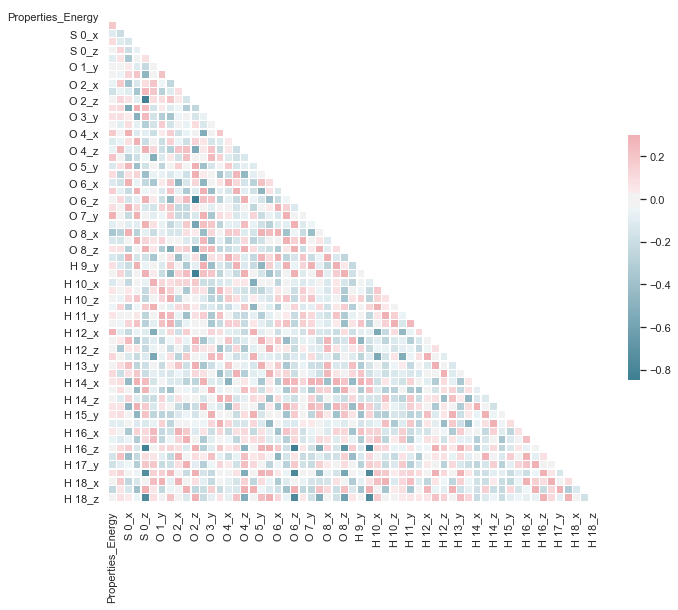

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = clusters_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

C:\Users\Ilaria\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


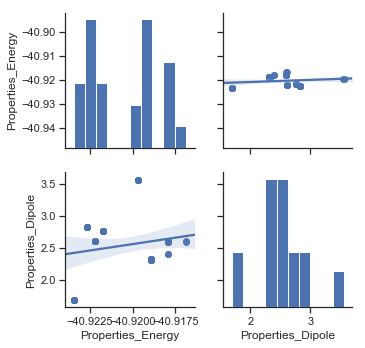

In [14]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
sns.pairplot(clusters_df,  kind="reg",vars=['Properties_Energy','Properties_Dipole'])

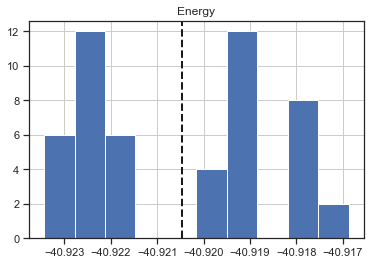

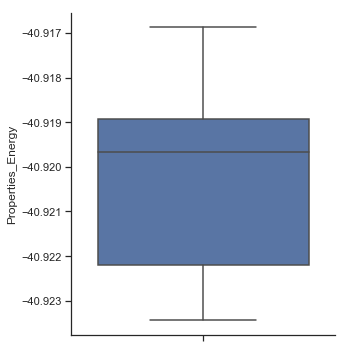

In [18]:

clusters_df['Properties_Energy'].hist()
plt.title("Energy")
plt.axvline(np.mean(clusters_df['Properties_Energy']), color='k', linestyle='dashed', linewidth=2)

sns.catplot( y="Properties_Energy", kind="box", data=clusters_df)
plt.show()

## Linear regression
We can implemente a linear regression model to predict the energy (y)of our cluster wrt to the coordinates variable (X).


In [10]:
clusters_df.loc[range(5),:]

,Properties_Energy,Properties_Dipole,S 0_x,S 0_y,S 0_z,O 1_x,O 1_y,O 1_z,O 2_x,O 2_y,...,H 15_z,H 16_x,H 16_y,H 16_z,H 17_x,H 17_y,H 17_z,H 18_x,H 18_y,H 18_z
0,-40.917924,2.402,0.141169,0.586462,-1.579178,1.571959,0.634674,1.587390,-0.496376,-0.793090,...,-0.603801,0.369601,-0.238477,1.922843,-1.215370,-0.160903,1.456282,-0.303001,-1.543416,1.207911
1,-40.916876,2.607,0.532400,0.529017,-1.645222,1.375753,0.925034,1.661882,-0.636579,-0.551587,...,-0.590325,0.204524,0.070750,1.907475,-1.381973,-0.021312,1.431595,-0.402779,-1.345929,1.296041
2,-40.917924,2.399,0.411648,0.774200,-1.445017,1.090589,1.193316,1.564453,-0.541489,-0.670648,...,0.501951,0.124739,0.152353,1.893355,-1.373890,-0.388308,1.376759,-0.095197,-1.404396,1.380670
3,-40.918934,2.307,1.126023,-0.412876,-1.253473,-0.426702,2.059957,-0.655682,-0.251529,-0.760866,...,-0.513367,-0.412030,0.254635,2.023950,-1.049674,-1.119570,1.360355,0.546613,-0.786457,1.181696
4,-40.918934,2.307,0.417969,-0.742542,1.511013,0.781689,1.806020,-1.803510,0.223932,-0.656572,...,1.322415,-0.780911,-0.732297,-1.749327,0.439209,0.354772,-2.003723,0.665441,-0.931049,-1.000398


In [20]:
energy=clusters_df['Properties_Energy']
coord=clusters_df.drop(['Properties_Energy','Properties_Dipole'],1) #dipole? in or out?

In [21]:
#divide the dataset in train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(coord,energy,test_size=0.20)

In [29]:
#linear regression model on train set
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
model.coef
_r_sq = model.score(x_train, y_train)
r_sq #all variance of data is explained by the dataset, more features than obs 

1.0

In [35]:
#predict from the test
y_pred = model.predict(x_test)
pred_test = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
pred_test
#it works too well, since we have more variables than observations

,Actual,Predicted
0,-40.922677,-40.911117
1,-40.919661,-40.914175
2,-40.916876,-40.920274
3,-40.922677,-40.920593
4,-40.919661,-40.915632
5,-40.918934,-40.924768
6,-40.922677,-40.915395
7,-40.917931,-40.922028
8,-40.917931,-40.915173
9,-40.922190,-40.918341


In [30]:
#feature selection alternative
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFE(estimator, 5, step=1)
selector = selector.fit(x_train, y_train)
print(selector.support_) 
print(selector.ranking_)


array([54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38,
       37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21,
       20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,
        3,  2,  1,  1,  1,  1,  1])

In [27]:
#oxigen O8 seems the most significant variable in our model
model1 = LinearRegression().fit(x_train.loc[:,('O 1_y','O 8_x')], y_train) #select the most significant variables...
print('R2 simple reg',model1.score(x_train.loc[:,('O 1_y','O 8_x')], y_train))

R2 simple reg 0.140112198536269


## Principal Component Analysis
To reduce the dimentionality of our data, we will apply PCA to our coordinates variable, in order to select new variables, that explain at least 80% of the variability of our data.

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(coord)
principalDf = pd.DataFrame(data = principalComponents , columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
print('Explained variance (%) :', np.sum(pca.explained_variance_ratio_))

Explained variance (%) : 0.8044133571151267


Explained variance PC1(%) : 0.20865896952522633
Explained variance PC2(%) : 0.13763270268597166


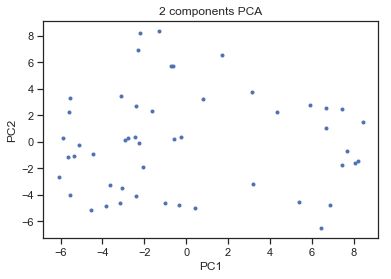

In [52]:
#2D graph of first two PCs
print('Explained variance PC1(%) :', pca.explained_variance_ratio_[0])
print('Explained variance PC2(%) :', pca.explained_variance_ratio_[1])

plt.plot(principalDf['PC1'] , principalDf['PC2'], '.')
plt.title("2 components PCA")
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

## K-means
It's time to cluster the clusters, we can use a k-mean algorith.

In [72]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)  #we should chose the number of clusters
kmeans.fit(clusters_df)
y_kmeans = kmeans.predict(clusters_df)

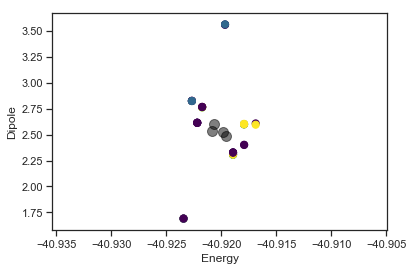

In [74]:
plt.scatter(clusters_df['Properties_Energy'], clusters_df['Properties_Dipole'], c=y_kmeans,s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.xlabel('Energy')
plt.ylabel('Dipole')
plt.show()

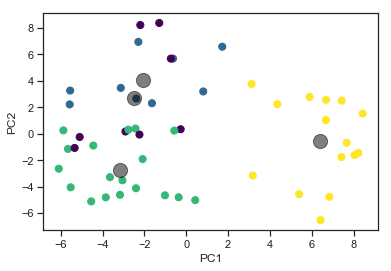

In [71]:
#clustering using PCS as variables
finalDf = pd.concat([principalDf, clusters_df[['Properties_Energy']]], axis = 1)
finalDf = pd.concat([finalDf, clusters_df[['Properties_Dipole']]], axis = 1)
kmeans.fit(finalDf)
y_kmeans = kmeans.predict(finalDf)
plt.scatter(finalDf['PC1'], finalDf['PC2'], c=y_kmeans,s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

In [166]:
files = pd.read_csv("Data_Collection.csv")
np.array(files.Filename)

array([ 0, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  1, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  2, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  3,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  4,  5,  6,  7,  8,  9])

In [43]:
test = next(files.iterrows())[1]
print(test)
type(test.Filename)

Filename                      0
LogPath      ./Data1/logs/0.log
XYZPath     ./Data1/coord/0.xyz
Dipole                    2.402
Energy                 -40.9179
Name: 0, dtype: object


int

In [10]:
xyz_test = pd.read_csv("Data1/coord/0.xyz", \
                       sep='\s+', \
                       skiprows=2, \
                       header=None, \
                       index_col=0, \
                       names=['x','y','z']\
                      ).sort_index(ascending=False)
# Atom names in indexes

```python
xyz_test = pd.read_csv("Data1/0.xyz", \
                       sep='\s+',\
                       skiprows=2, \
                       header=None, \
                       names=['atom','x','y','z']\
                      ).sort_values(by='atom',ascending=False).reset_index(drop=True)
# Atom names in col 0
```


Print the names of the atoms

> How is order handled under one label?
- what is the order of other coord files?

Save the names of the atoms to an array

In [11]:
arr_indexes = np.array(xyz_test.index)

In [12]:
arr_indexes.shape[0]

19

Get numbers for the atoms and concatenate them with the labels

In [13]:
list_atomnames = []

for i,j in enumerate(arr_indexes):
    list_atomnames.append("{} {}".format(j,i))

arr_atomnames = np.array(list_atomnames)

Make the multi-index array of tuples

In [14]:
top_arr = np.empty((arr_atomnames.size * 3)).astype(str)
top_arr[0::3] = arr_atomnames
top_arr[1::3] = arr_atomnames
top_arr[2::3] = arr_atomnames
#top_arr

In [15]:
butt_arr = np.empty((arr_atomnames.size * 3)).astype(str)
butt_arr[0::3] = "x"
butt_arr[1::3] = "y"
butt_arr[2::3] = "z"
#butt_arr

In [16]:
col_arr = np.vstack((top_arr,butt_arr))
#col_arr.transpose()
col_arr_tuples = list(zip(*col_arr))
col_arr_tuples[:5]

[('S 0', 'x'), ('S 0', 'y'), ('S 0', 'z'), ('O 1', 'x'), ('O 1', 'y')]

Multi-index column names

In [17]:
col_names = pd.MultiIndex.from_tuples(col_arr_tuples, names=["Atom","Coord"])
col_names

MultiIndex(levels=[['H 10', 'H 11', 'H 12', 'H 13', 'H 14', 'H 15', 'H 16', 'H 17', 'H 18', 'H 9', 'O 1', 'O 2', 'O 3', 'O 4', 'O 5', 'O 6', 'O 7', 'O 8', 'S 0'], ['x', 'y', 'z']],
           labels=[[18, 18, 18, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 17, 9, 9, 9, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8], [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]],
           names=['Atom', 'Coord'])

In [18]:
3*19

57

In [19]:
xyz_test.values.flatten().shape

(57,)

In [20]:
xyz_flat = xyz_test.values.flatten().reshape(1,57)

In [21]:
type(xyz_flat)

numpy.ndarray

In [23]:
coord_df = pd.DataFrame(xyz_flat,index=['a'],columns=col_names)
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(coord_df)

Atom        S 0                           O 1                          O 2  \
Coord         x         y         z         x         y        z         x   
a      0.141169  0.586462 -1.579178  1.571959  0.634674  1.58739 -0.496376   

Atom                           O 3                          O 4            \
Coord        y         z         x         y         z        x         y   
a     -0.79309  1.912224  0.122061 -2.393288  0.079677  1.01335 -0.572018   

Atom                  O 5                          O 6                      \
Coord         z         x         y        z         x         y         z   
a     -1.481227 -1.989939  0.798705  0.68009  0.522933  1.346199 -2.915277   

Atom        O 7                           O 8                          H 9  \
Coord         x         y         z         x        y         z         x   
a      0.369189  1.535905 -0.499852 -1.256258  0.20951 -1.702193  0.192515   

Atom                           H 10                          H 

In [24]:
coord_df

Atom        S 0                           O 1                          O 2  \
Coord         x         y         z         x         y        z         x   
a      0.141169  0.586462 -1.579178  1.571959  0.634674  1.58739 -0.496376   

Atom                           O 3    ...         H 15      H 16            \
Coord        y         z         x    ...            z         x         y   
a     -0.79309  1.912224  0.122061    ...    -0.603801  0.369601 -0.238477   

Atom                H 17                          H 18                      
Coord         z        x         y         z         x         y         z  
a      1.922843 -1.21537 -0.160903  1.456282 -0.303001 -1.543416  1.207911  

[1 rows x 57 columns]